# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## 1、读取数据

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
original_house_price = pd.read_csv("house_price.csv")
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2、评估和清理数据

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在:
* 丢失数据
* 重复数据
* 不一致数据
* 无效/错误数据

In [72]:
cleaned_house_price = original_house_price.copy()

### 2.1 数据整齐度--结构

In [73]:
cleaned_house_price.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
179,5215000,3180,3,2,2,yes,no,no,no,no,2,no,semi-furnished
425,3360000,3185,2,1,1,yes,no,yes,no,no,2,no,furnished
338,3885000,3780,2,1,2,yes,yes,yes,no,no,0,no,semi-furnished
286,4235000,2787,3,1,1,yes,no,yes,no,no,0,yes,furnished
442,3220000,2684,2,1,1,yes,no,no,no,yes,1,no,unfurnished
309,4130000,4632,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
246,4550000,3520,3,1,1,yes,no,no,no,no,0,yes,semi-furnished
348,3815000,3150,2,2,1,no,no,yes,no,no,0,no,semi-furnished


从随机提取的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 2.2 数据干净度--内容

In [74]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从输出结果来看，`cleaned_house_price`共有545条观察值，变量不存在缺失值。

数据类型方面，我们已知`mainroad`（是否位于主路）、`guestroom`（是否有客房）、`basement`（是否有地下室）、`hotwaterheating`（是否有热水器）、`airconditioning`（是否有空调）、`prefarea`（是否位于城市首选社区）、`furnishingstatus`（装修状态）都是分类数据，可以把数据类型都转换为Category。

In [75]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

In [76]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### 2.2.1 处理缺失数据

由前面的分析可知，不存在缺失值

#### 2.2.2 处理重复数据

根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

#### 2.2.3 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [77]:
cleaned_house_price['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [78]:
cleaned_house_price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [79]:
cleaned_house_price['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [80]:
cleaned_house_price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [81]:
cleaned_house_price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [82]:
cleaned_house_price["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [83]:
cleaned_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

从以上输出结果来看，均不存在不一致数据。

#### 2.2.4 处理无效或错误数据

In [84]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [85]:
cleaned_house_price.to_csv("cleaned_house_price.csv")

从以上统计信息来看，`cleaned_house_price`里不存在脱离现实意义的数值。

## 3、整理数据

可以在后续分析数据的过程中，根据得到的各变量之间的相关性，再将自变量提取出来

## 4、可视化探索数据

In [86]:
sns.set_palette("PRGn")

由于变量数过多，所以我们依次分析每个变量与最终想要研究的目标——房价之间的关系，而不是直接使用pair plot查看

In [87]:
#启用matpltlib全局自动调整布局
plt.rcParams["figure.autolayout"] = True

### 4.1 房价整体分布

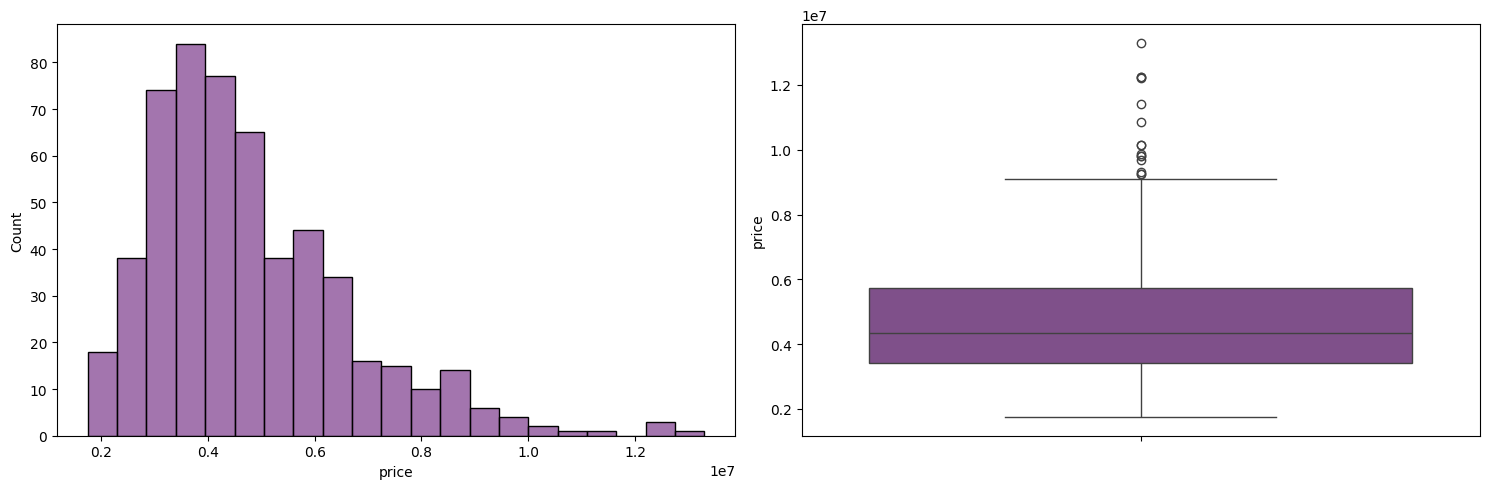

In [88]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.histplot(cleaned_house_price,x='price',ax=axes[0])
sns.boxplot(cleaned_house_price,y='price',ax=axes[1])
plt.show()

房价呈右偏态分布，即大部分值比平均值低，说明数据集中的大多数房子价格中等
但有一些价格很高的极端值，使得均值被拉高：从箱型图也可以观察到上界上面有若干异常值出现。

### 4.2 其他数值变量整体分布

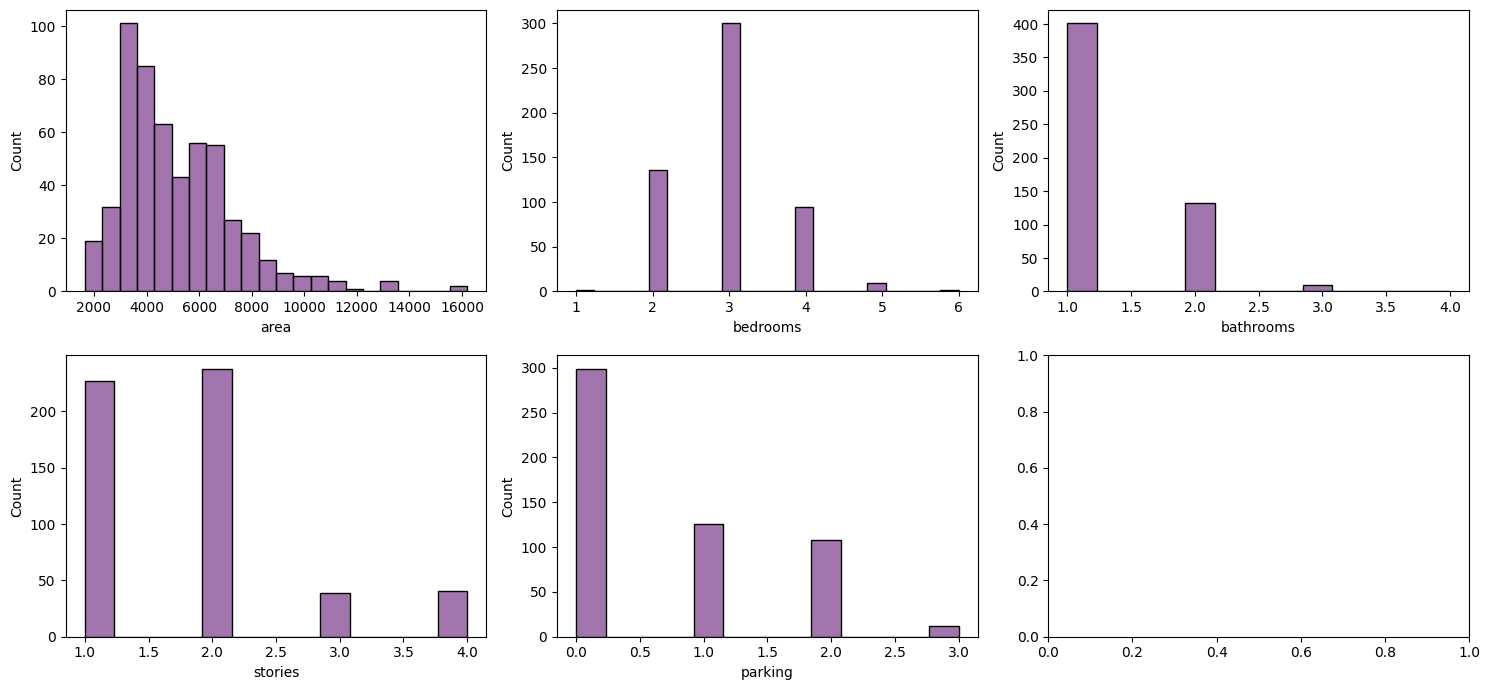

In [89]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
sns.histplot(cleaned_house_price,x='area',ax=axes[0,0])
sns.histplot(cleaned_house_price,x='bedrooms',ax=axes[0,1])
sns.histplot(cleaned_house_price,x='bathrooms',ax=axes[0,2])
sns.histplot(cleaned_house_price,x='stories',ax=axes[1,0])
sns.histplot(cleaned_house_price,x='parking',ax=axes[1,1])
plt.show()

发现其他数值变量除卧室数外的分布与房价相似，也呈右偏态分布。

不过这些数值变量有些本身就是高度相关的。

- 此数据集中房子的卧室数范围为1-6个，其中大多房子有2-4个。
- 数据集中房子洗手间数量最少1个，最多4个，其中为1个的数量最多。
- 此数据集中房子的楼层数范围为1-4层，其中大多房子有1层或2层。
- 此数据集中房子的车库数范围为0-3个，不带车库的房子数量是最多的，其次是1个和2个。

### 4.3 房价与面积

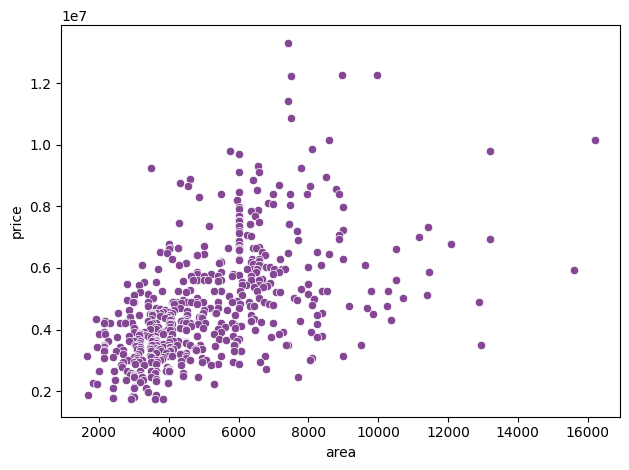

In [90]:
sns.scatterplot(cleaned_house_price,x='area',y='price')
plt.show()

大致判断是正相关关系，但关系的强度需要后续通过计算相关性来得到。

### 4.3 房价与卧室数

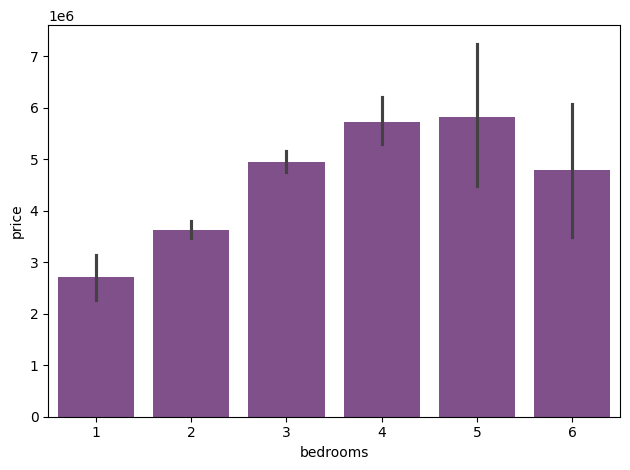

In [91]:
sns.barplot(cleaned_house_price,x='bedrooms',y='price')
plt.show()

从平均房价与卧室数之间的柱状图来看，当卧室数小于5个时，卧室数多的房子价格也相应高，但一旦多于5个，房价并不一定相应更高。

### 4.3 房价与厕所数/楼层数/车库容量

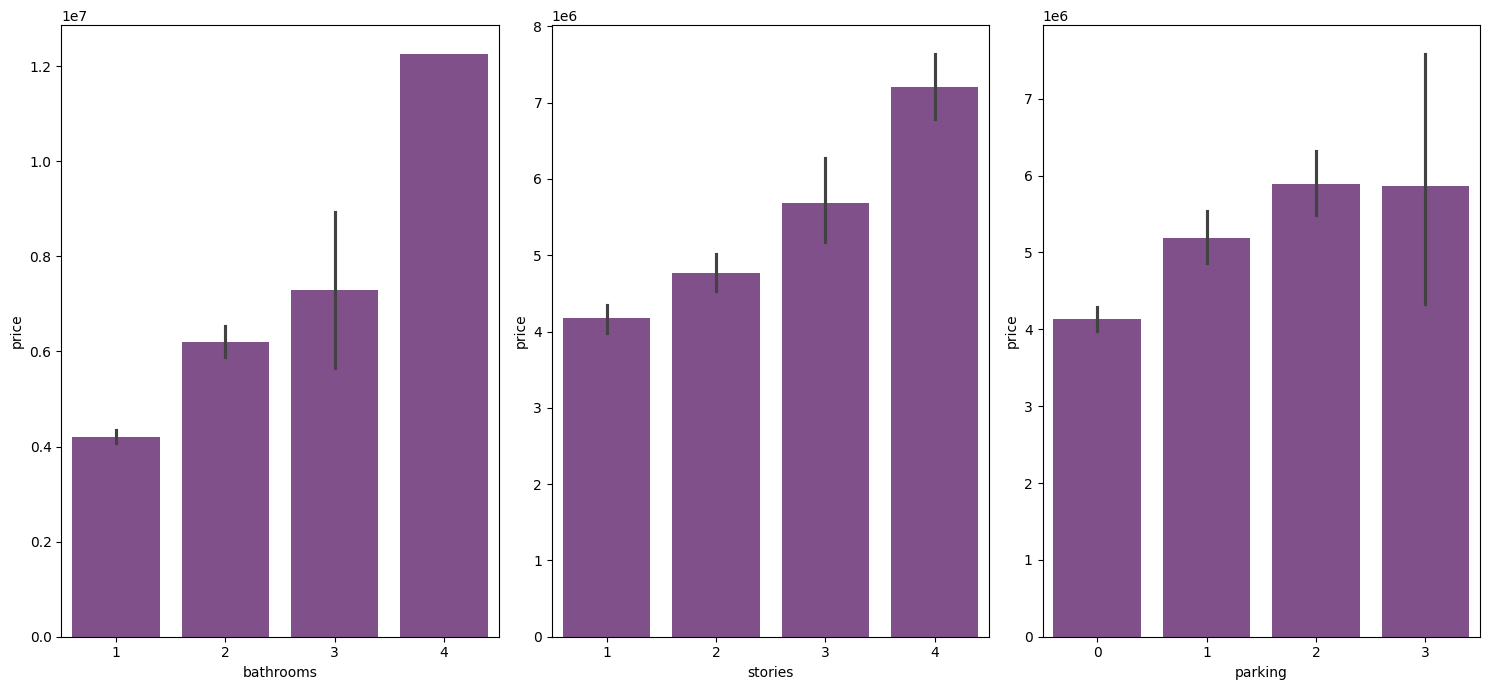

In [92]:
fig,axes=plt.subplots(1,3,figsize=(15,7))
sns.barplot(cleaned_house_price,x='bathrooms',y='price',ax=axes[0])
sns.barplot(cleaned_house_price,x='stories',y='price',ax=axes[1])
sns.barplot(cleaned_house_price,x='parking',y='price',ax=axes[2])
plt.show()

发现：
* 洗手间多的房子价格也相应高。
* 楼层多的房子价格也相应高。
* 车库多的房子价格也相应高，但超过2个后，房价并不一定相应更高。

### 4.4 房价与是否在主路

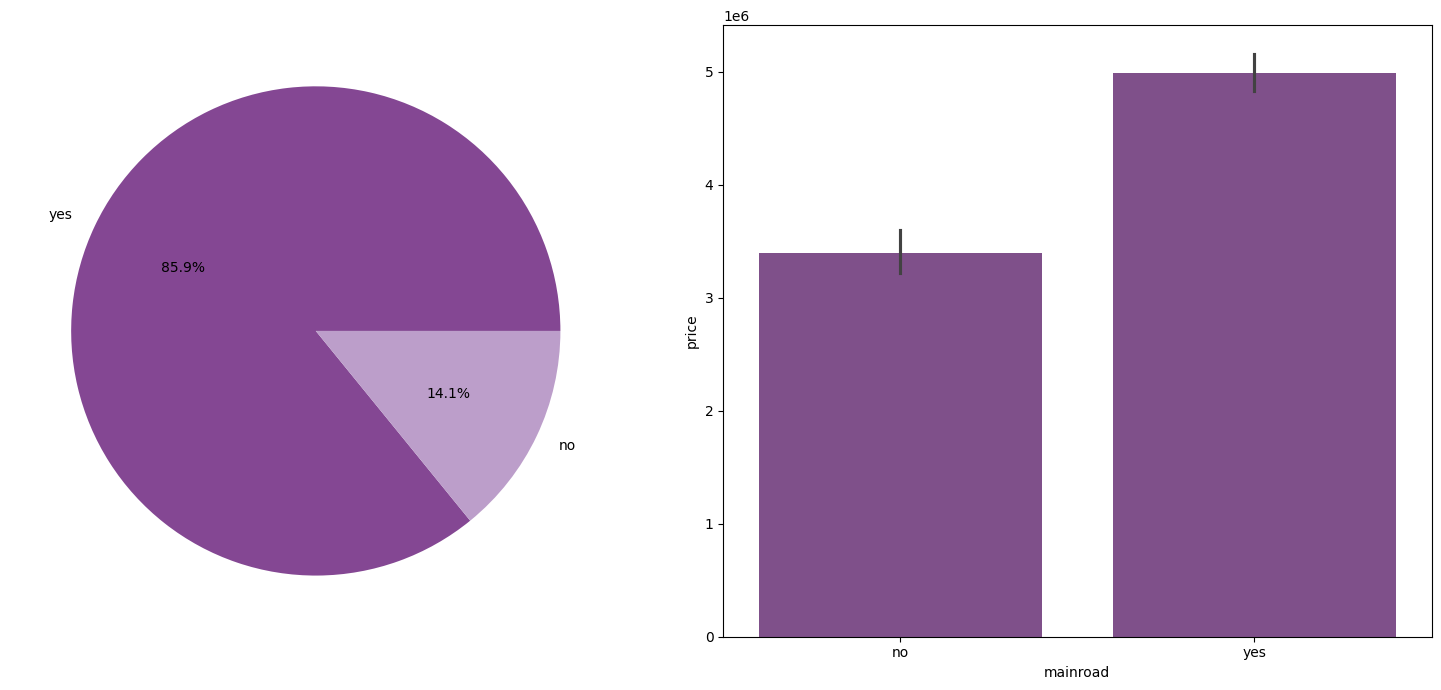

In [93]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
mainroad_count = cleaned_house_price['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count,labels=mainroad_label,autopct = '%.1f%%')
sns.barplot(cleaned_house_price,x='mainroad',y='price',ax=axes[1])
plt.show()

此数据集中房子大多数位于主路。

从平均房价与楼层数之间的柱状图来看，在主路的的房子价格也相应高。

### 4.5 房价与是否有客房

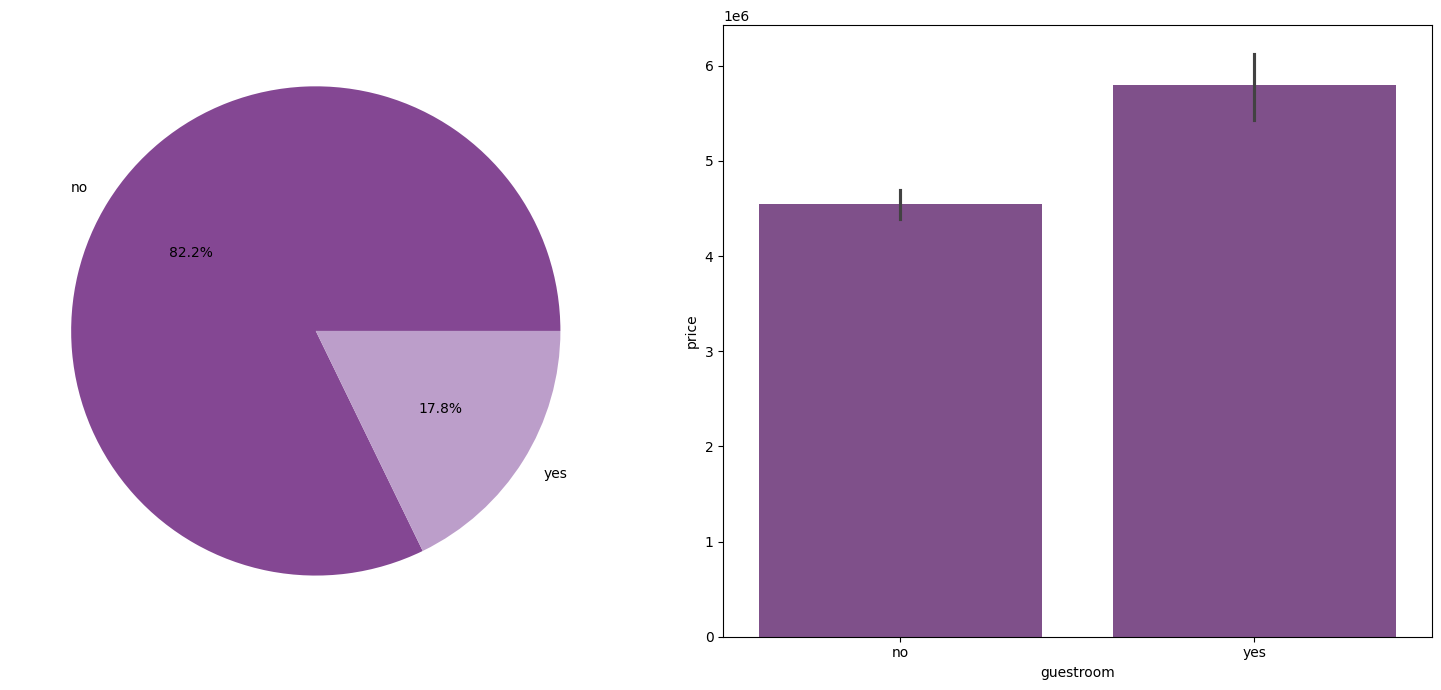

In [94]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count,labels=guestroom_label,autopct = '%.1f%%')
sns.barplot(cleaned_house_price,x='guestroom',y='price',ax=axes[1])
plt.show()

此数据集中房子大部分没有客房。

从平均房价与楼层数之间的柱状图来看，有客房的的房子价格也相应高。

### 4.5 房价与是否有地下室

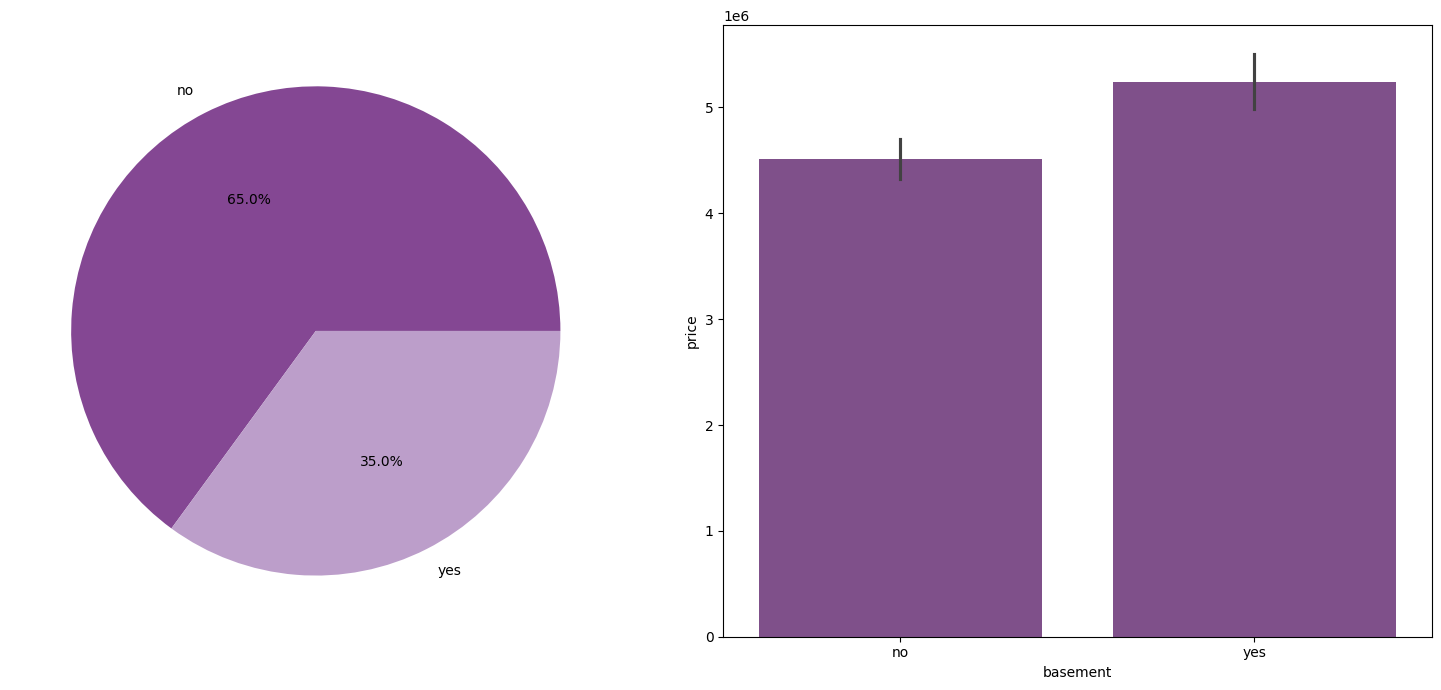

In [95]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
basement_count = cleaned_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count,labels=basement_label,autopct = '%.1f%%')
sns.barplot(cleaned_house_price,x='basement',y='price',ax=axes[1])
plt.show()

此数据集中大部分的房子没有地下室。

从平均房价与地下室之间的柱状图来看，有地下室的的房子价格也相应高。

### 4.5 房价与是否有热水器

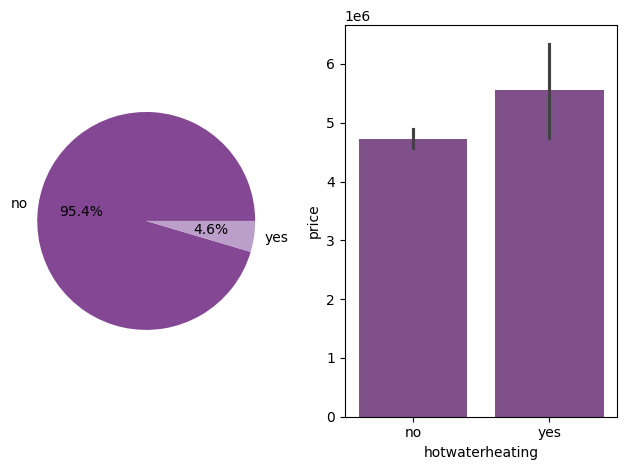

In [96]:
fig, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label,autopct='%.1f%%')
sns.barplot(cleaned_house_price, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

此数据集中房子绝大部分没有热水器。

从平均房价与热水器之间的柱状图来看，有热水器的的房子价格也相应高。

### 4.5 房价与是否有空调

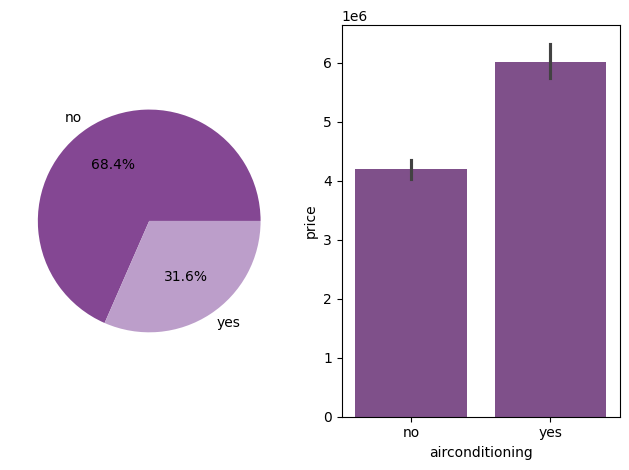

In [97]:
fig, axes = plt.subplots(1, 2)
airconditioning_count = cleaned_house_price['airconditioning'].value_counts()
airconditioning_label = hotwaterheating_count.index
axes[0].pie(airconditioning_count, labels=airconditioning_label,autopct='%.1f%%')
sns.barplot(cleaned_house_price, x='airconditioning', y='price', ax=axes[1])
plt.show()

此数据集中大部分的房子没有空调。

从平均房价与空调之间的柱状图来看，有空调的的房子价格也相应高。

### 4.5 房价与是否位于城市首选社区

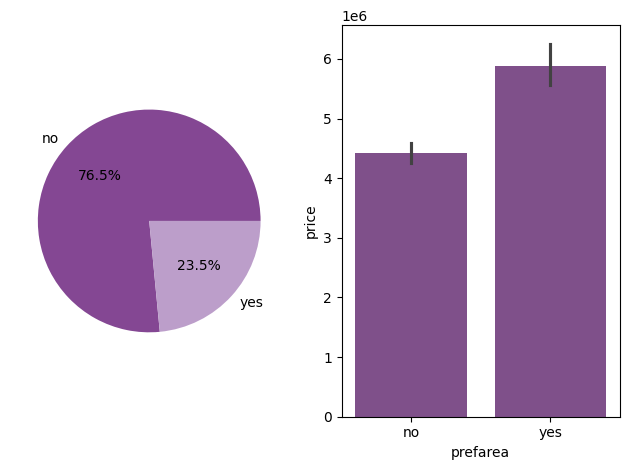

In [98]:
fig, axes = plt.subplots(1, 2)
prefarea_count = cleaned_house_price['prefarea'].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count, labels=prefarea_label,autopct='%.1f%%')
sns.barplot(cleaned_house_price, x='prefarea', y='price', ax=axes[1])
plt.show()

此数据集中大部分房子不在城市首选社区。

从平均房价与城市首选社区之间的柱状图来看，在城市首选社区的的房子价格也相应高。

### 4.5 房价与装修状态

/tmp/ipykernel_12743/1325374907.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')


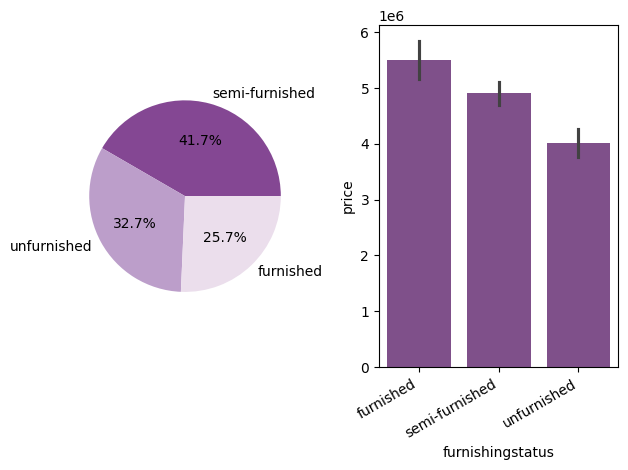

In [99]:
fig, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label,autopct='%.1f%%')
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')
plt.show()

此数据集中简装房子较多，1/3左右的房子为毛坯，1/4左右房子为精装。

从平均房价与装修状态之间的柱状图来看，精装的房子价格高于简装，简装高于毛坯。

## 5、分析数据

In [100]:
cleaned_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [101]:
import statsmodels.api as sm

1、先将所有分类变量转为虚拟变量，需要注意若某个分类变量有n种值应对应转为(n-1)个虚拟变量，否则会导致共线性问题

In [102]:
cleaned_house_price = pd.get_dummies(cleaned_house_price, drop_first=True, columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'], dtype=int)
cleaned_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


2、将因变量：price提取出来

In [103]:
y = cleaned_house_price['price']

3、把可能的自变量提取出来

In [104]:
X = cleaned_house_price.drop(['price'],axis=1)

3、然后检查自变量之间的相关性

<Axes: >

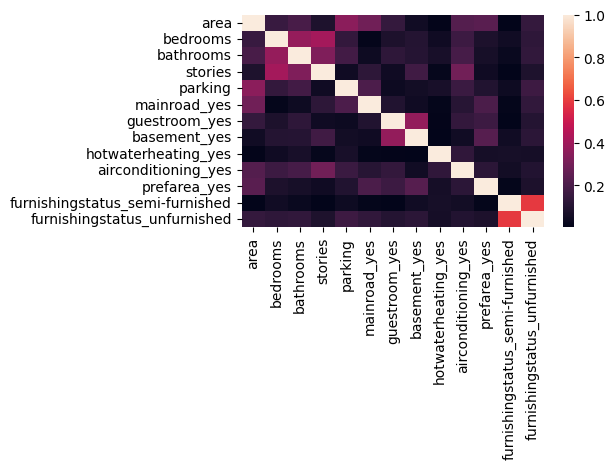

In [105]:
sns.heatmap(X.corr().abs())

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [106]:
X_corr = X.corr().abs()>0.8
X_corr

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


In [107]:
X_corr.sum()

area                               1
bedrooms                           1
bathrooms                          1
stories                            1
parking                            1
mainroad_yes                       1
guestroom_yes                      1
basement_yes                       1
hotwaterheating_yes                1
airconditioning_yes                1
prefarea_yes                       1
furnishingstatus_semi-furnished    1
furnishingstatus_unfurnished       1
dtype: int64

从以上输出来看，不同变量之间相关系数的绝对值均小于等于0.8。

4、给线性方程添加截距，即将1这个常量作为b0的系数

In [110]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


5、使用最小二乘法建立第一版线性回归模型并用数据拟合

In [111]:
model = sm.OLS(y,X).fit()

6、查看模型拟合效果

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 17 Oct 2025   Prob (F-statistic):          9.07e-123
Time:                        18:39:17   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为以下因素对房屋价格没有显著性影响：卧室数、是否为简装房。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。

并且观察到此版的$R^2=0.682$也比较低，说明拟合效果不好

可以把这些变量移除后，再次建立第二版线性回归模型。

7、移除对因变量没有显著影响的自变量，并建立第二版线性回归模型

In [113]:
X.drop(['bedrooms','const','furnishingstatus_semi-furnished'],axis=1,inplace=True)
X

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [114]:
model = sm.OLS(y,X).fit()

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):                        0.00
Time:                        18:45:37   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，当我们把P值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了模型对现有数据的拟合度。

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

线性回归模型预测以下因素的增加（或存在）会显著降低房屋价格：房屋未经装修，为毛坯房。

8、对具备以下属性的房屋进行价格预测：

  面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [124]:
house_to_predict = pd.DataFrame({'area': [6500], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': [2], 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
house_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我们需要：
* 把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。因为预测数据包含的分类可能不全。
* 确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [125]:
house_to_predict['mainroad'] = pd.Categorical(house_to_predict['mainroad'],categories=['yes','no'])
house_to_predict['guestroom'] = pd.Categorical(house_to_predict['guestroom'],categories=['yes','no'])
house_to_predict['basement'] = pd.Categorical(house_to_predict['basement'],categories=['yes','no'])
house_to_predict['hotwaterheating'] = pd.Categorical(house_to_predict['hotwaterheating'],categories=['yes','no'])
house_to_predict['airconditioning'] = pd.Categorical(house_to_predict['airconditioning'],categories=['yes','no'])
house_to_predict['prefarea'] = pd.Categorical(house_to_predict['prefarea'],categories=['yes','no'])
house_to_predict['furnishingstatus'] = pd.Categorical(house_to_predict['furnishingstatus'],categories=['furnished', 'semi-furnished', 'unfurnished'])

In [126]:
house_to_predict = pd.get_dummies(house_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
house_to_predict

,area,bedrooms,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,1,1,0,0,1,0,1,0


In [127]:
house_to_predict.drop(['bedrooms','furnishingstatus_semi-furnished'],axis=1,inplace=True)

In [128]:
predicted_house_val = model.predict(house_to_predict)
predicted_house_val

0    6.997695e+06
dtype: float64

项目结论：本数据集得到的线性回归模型对目标房的预测的价格为：6997695。